In [1]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
######################################### Random forest ############################################

In [2]:
titanic_data = pd.read_csv(r"C:\Users\logo_\Documents\Python Scripts\train.csv")

X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

y = titanic_data.Survived

X = pd.get_dummies(X)

X = X.fillna({'Age': X.Age.median()})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [3]:
clf_rf = RandomForestClassifier(random_state=42)

In [4]:
parameters = {'n_estimators' : [10, 20, 30], 'max_depth' : [2, 5, 7, 10], 
              'min_samples_leaf' : [5, 10, 15], 'min_samples_split' : [10, 20, 30]}

In [5]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5)

In [6]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 5, 7, 10],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [10, 20, 30]})

In [7]:
grid_search_cv_clf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 20}

In [8]:
best_clf = grid_search_cv_clf.best_estimator_

In [12]:
best_clf.score(X_test, y_test)

0.8203389830508474

In [14]:
feature_importances = best_clf.feature_importances_

In [15]:
feature_importances_df = pd.DataFrame({'features' : list(X_train),
                                      'feature_importances' : feature_importances})

In [16]:
feature_importances_df

,features,feature_importances
0,Pclass,0.138268
1,Age,0.123171
2,SibSp,0.033967
3,Parch,0.028566
4,Fare,0.150332
5,Sex_female,0.198208
6,Sex_male,0.275663
7,Embarked_C,0.027841
8,Embarked_Q,0.005424
9,Embarked_S,0.018561


In [17]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
6,Sex_male,0.275663
5,Sex_female,0.198208
4,Fare,0.150332
0,Pclass,0.138268
1,Age,0.123171
2,SibSp,0.033967
3,Parch,0.028566
7,Embarked_C,0.027841
9,Embarked_S,0.018561
8,Embarked_Q,0.005424


In [ ]:
# to draw feature importance
#imp = pd.DataFrame(rf.feature_importances_, index=x_train.columns, columns=['importance'])
#imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [ ]:
################################# Random forest: practice ############################################

In [18]:
mush = pd.read_csv(r"C:\Users\logo_\Downloads\training_mush.csv")
mush

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6088,2,0,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,3,1,0
6089,3,2,2,0,2,1,0,1,0,1,...,6,7,0,2,1,0,7,4,0,1
6090,5,2,3,0,1,1,0,1,9,0,...,7,7,0,2,1,4,3,4,0,1
6091,3,2,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0


In [103]:
X_train = mush.drop(['class'], axis=1)
y_train = pd.Series(mush['class'])
y_train

0       0
1       1
2       1
3       0
4       0
       ..
6088    0
6089    1
6090    1
6091    0
6092    1
Name: class, Length: 6093, dtype: int64

In [104]:
clf_mush = RandomForestClassifier(random_state=0)

In [108]:
parameters = {'n_estimators' : range(10, 51, 10), 'max_depth' : range(1, 13, 2), 
              'min_samples_leaf' : range(1, 8), 'min_samples_split' : range(2, 10, 2)}

In [114]:
grid_search_clf_mush = GridSearchCV(clf_mush, parameters, cv=3, n_jobs=-1)

In [115]:
%%time
grid_search_clf_mush.fit(X_train, y_train)

CPU times: total: 2.16 s
Wall time: 21.9 s


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [118]:
best_clf_mush = grid_search_clf_mush.best_estimator_

In [120]:
feature_importances = best_clf_mush.feature_importances_

In [121]:
feature_importances_df = pd.DataFrame({'features' : list(X_train),
                                       'feature_importances' : feature_importances})

In [123]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
4,odor,0.188376
8,gill-color,0.103861
10,stalk-root,0.103793
19,spore-print-color,0.083564
6,gill-spacing,0.080840
18,ring-type,0.070726
3,bruises,0.070109
7,gill-size,0.068461
12,stalk-surface-below-ring,0.048296
20,population,0.043783


In [128]:
X_test = pd.read_csv(r"C:\Users\logo_\Downloads\testing_mush.csv")
X_test.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [134]:
predictions = best_clf_mush.predict(X_test)

In [136]:
predictions = pd.Series(predictions)

In [144]:
predictions.value_counts()

0    1055
1     976
Name: count, dtype: int64

In [ ]:
############################## Building confusion matrix ##############################

In [145]:
y_test = pd.read_csv(r"C:\Users\logo_\Downloads\testing_y_mush.csv\testing_y_mush.csv")

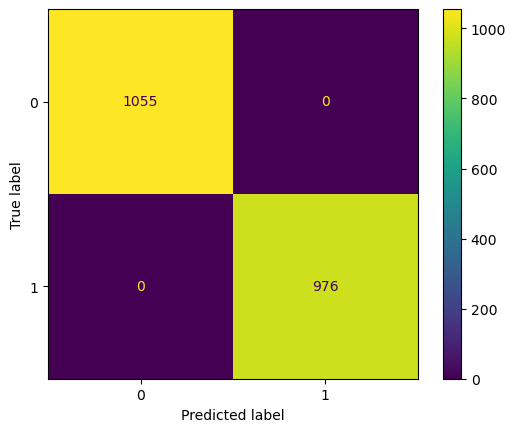

In [146]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
displ = ConfusionMatrixDisplay(cm)
displ.plot()

In [ ]:
############################## Invasion exercise ####################################################

In [148]:
invasion = pd.read_csv(r"C:\Users\logo_\Downloads\invasion.csv")
invasion

,class,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,transport,2.190672,6.716633,62.168208,0.347465,158221,44.932446
1,transport,3.453276,8.995909,62.994707,0.590094,385972,41.568300
2,transport,2.432994,6.938691,62.245807,0.329288,446482,40.123467
3,fighter,6.083763,3.019459,18.474555,0.174738,210125,11.384865
4,fighter,12.876769,2.452950,195.805771,0.150446,23109,11.328806
...,...,...,...,...,...,...,...
495,fighter,9.901731,7.162124,58.095069,0.145065,395762,12.901909
496,transport,3.574132,7.118835,62.928159,0.469670,435926,39.926551
497,fighter,9.186049,4.580781,412.102112,0.108195,299594,12.178203
498,fighter,8.278256,8.353756,268.121561,0.132661,361911,13.905809


In [171]:
X_train = invasion.drop(['class'], axis=1)
y_train = invasion['class']

In [172]:
clf_ship = RandomForestClassifier(random_state=0)

In [173]:
parameters = {'n_estimators' : range(10, 51, 10), 'max_depth' : range(1, 13, 2), 
              'min_samples_leaf' : range(1, 8), 'min_samples_split' : range(2, 10, 2)}

In [174]:
ship_gridsearch = GridSearchCV(clf_ship, parameters, cv=3, n_jobs=-1)

In [175]:
ship_gridsearch.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)})

In [176]:
ship_gridsearch.best_params_

{'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [177]:
best_clf = ship_gridsearch.best_estimator_

In [178]:
X_test = pd.read_csv(r"C:\Users\logo_\Downloads\operative_information.csv")

In [182]:
prediction = pd.Series(best_clf.predict(X_test))

In [183]:
prediction.value_counts()

fighter      675
transport    595
cruiser      230
Name: count, dtype: int64

In [184]:
feature_importances = best_clf.feature_importances_

In [186]:
feature_importances_df = pd.DataFrame({'features' : list(X_train),
                                       'feature_importances' : feature_importances})
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
3,brightness,0.363803
5,volume,0.257661
2,speed,0.171441
1,i_reflection,0.124372
0,g_reflection,0.082723
4,time_of_observance,0.000000


In [193]:
space = pd.read_csv(r"C:\Users\logo_\Downloads\space_can_be_a_dangerous_place.csv")
X = space.drop(['dangerous'], axis=1)
y = space['dangerous']

In [208]:
space_clf = RandomForestClassifier(random_state=0)
parameters = {'n_estimators' : [10],
              'max_depth' : [10],
              'min_samples_split' : range(10, 31, 10),
                'min_samples_leaf' : range(5, 11, 5)}
space_grid =  GridSearchCV(space_clf, parameters, cv=3, n_jobs=-1)
space_grid.fit(X,y)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [10], 'min_samples_leaf': range(5, 11, 5),
                         'min_samples_split': range(10, 31, 10),
                         'n_estimators': [10]})

In [209]:
best_clf = space_grid.best_estimator_

In [212]:
feature_importances = best_clf.feature_importances_

In [215]:
feature_importances_df = pd.DataFrame({'features' : list(X),
                                       'feature_importances' : feature_importances})

In [216]:
feature_importances_df.sort_values('feature_importances', ascending=False)

,features,feature_importances
5,buggers_were_noticed,0.529045
6,nearby_system_has_planemo,0.400886
3,dustiness,0.016122
1,phi,0.014680
4,black_hole_is_near,0.013402
0,r,0.013368
2,peradventure_index,0.012498


<Axes: >

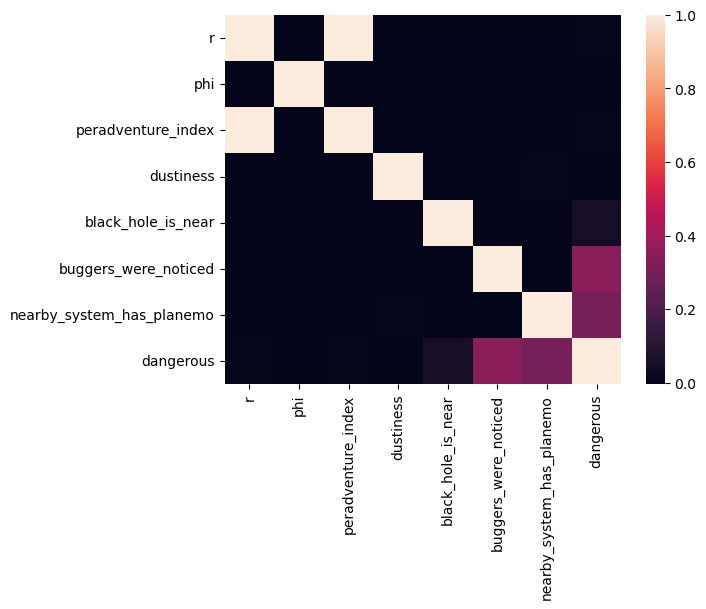

In [217]:
#heatmap
corr = space.corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)